In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model


In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be in the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Reshape the data to be 2D (num_samples, num_features)
x_train = np.reshape(x_train, (len(x_train), 28 * 28))  # (num_samples, height * width)
x_test = np.reshape(x_test, (len(x_test), 28 * 28))
x_train_noisy = np.reshape(x_train_noisy, (len(x_train_noisy), 28 * 28))
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 28 * 28))


Build the Denoising Autoencoder Model

In [3]:
# Define the size of the input layer
input_dim = 28 * 28  # 784

# Build the encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)

# Build the decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Compile the autoencoder model
denoising_autoencoder = Model(input_layer, decoded)
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


Train the Denoising Autoencoder

In [4]:
# Train the autoencoder
denoising_autoencoder.fit(x_train_noisy, x_train,
                           epochs=50,
                           batch_size=256,
                           shuffle=True,
                           validation_data=(x_test_noisy, x_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3317 - val_loss: 0.1803
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1715 - val_loss: 0.1525
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1501 - val_loss: 0.1413
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1404 - val_loss: 0.1350
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1346 - val_loss: 0.1312
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1312 - val_loss: 0.1288
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1283 - val_loss: 0.1258
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1257 - val_loss: 0.1241
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1237 - val_loss: 0.1226
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1220 - val_loss: 0.1210
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1205 - val_loss: 0.1196
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

Evaluate the Denoising Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


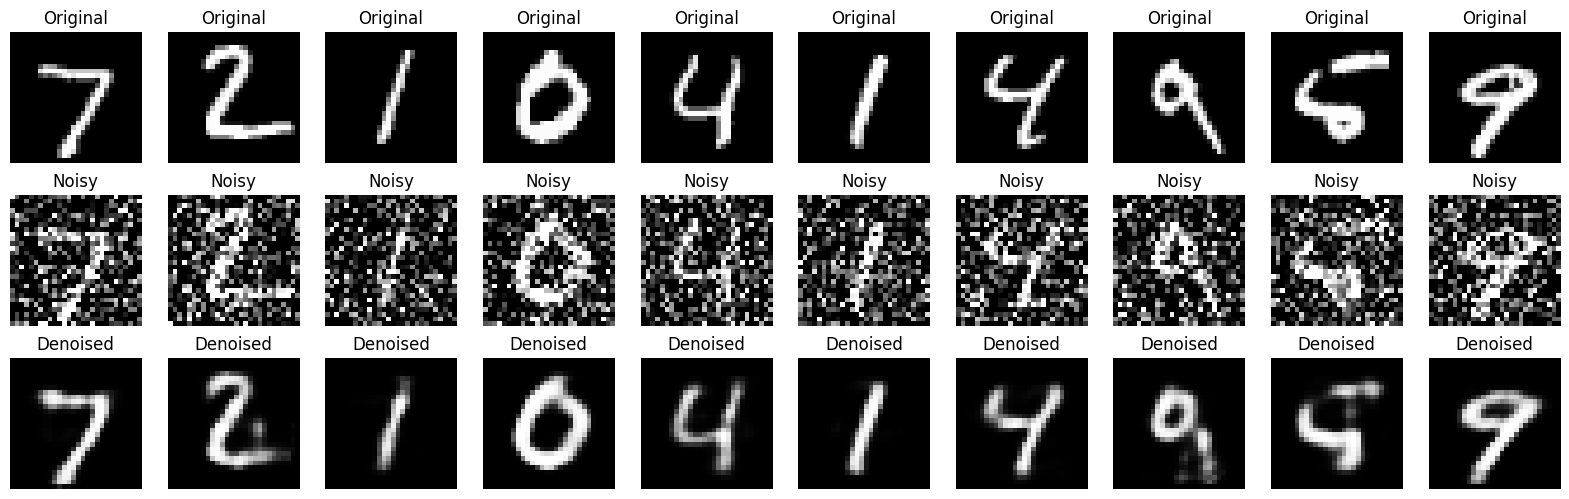

In [5]:
# Decode some noisy digits
denoised_imgs = denoising_autoencoder.predict(x_test_noisy)

# Display original, noisy, and denoised images
n = 10  # number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display noisy
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Display denoised
    ax = plt.subplot(3, n, i + 2*n + 1)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')
plt.show()
